In this notebook, we use **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** to segment mall customers based on their age, income, spending score, and gender. Unlike KMeans, DBSCAN does **not require specifying the number of clusters**, and it can **detect noise/outliers** naturally.

**DBSCAN Intuition**

- **Clusters**: Formed based on density — regions with high point concentration
- **Noise**: Points in low-density regions (not assigned to any cluster)
- **Key parameters**:
  - `eps`: Maximum distance between two points to be considered neighbors
  - `min_samples`: Minimum number of neighbors to form a cluster

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN

- Source: `Mall_Customers.csv` from Kaggle
- Features used:
  - `Age`
  - `Annual Income (k$)`
  - `Spending Score (1-100)`
  - `GenderEncoded` (from `Gender` using Label Encoding)

In [16]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Preprocessing Steps**

1. Load the dataset from the given path
2. Encode `Gender` using `LabelEncoder`
3. Select relevant features for clustering
4. Scale features using `StandardScaler` (DBSCAN is distance-based)

In [17]:
le = LabelEncoder()
df['GenderEncoded'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

In [18]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'GenderEncoded']]

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

**DBSCAN Clustering**

- After selecting `eps`, we fit `DBSCAN(eps=..., min_samples=...)` on the scaled data
- DBSCAN assigns:
  - `0, 1, 2, ...` → cluster labels
  - `-1` → noise points (outliers)
- Cluster labels are added back to the dataset

In [24]:
dbscan = DBSCAN(eps=0.7, min_samples=7)
labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = labels
df['Outlier'] = df['DBSCAN_Cluster'] == -1
df[['CustomerID', 'DBSCAN_Cluster', 'Outlier']].head()


,CustomerID,DBSCAN_Cluster,Outlier
0,1,-1,True
1,2,-1,True
2,3,-1,True
3,4,0,False
4,5,-1,True


**Cluster Visualization**

We plot clusters using:
- X-axis: `Annual Income`
- Y-axis: `Spending Score`
- Color: Cluster label


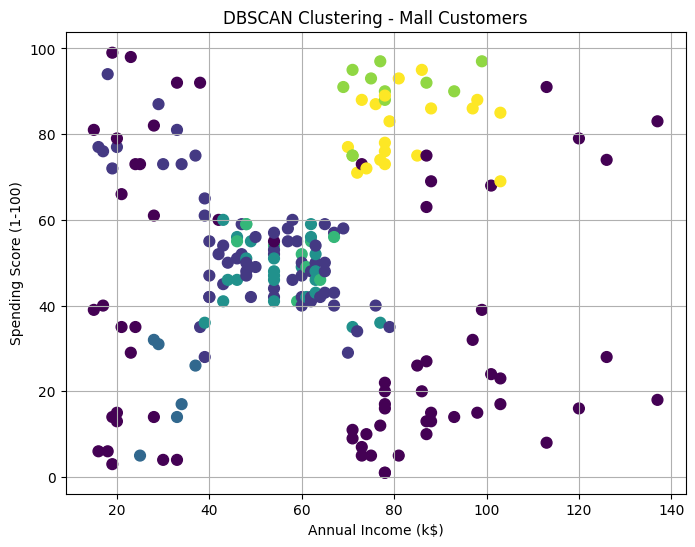

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=labels, cmap='viridis', s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering - Mall Customers')
plt.grid(True)
plt.show()

**Count of Unique Clusters and Outliers**

In [26]:
unique_clusters = len(set(labels)) - (1 if -1 in labels else 0)
outliers = list(labels).count(-1)

print(f"Clusters found: {unique_clusters}")
print(f"Outliers found: {outliers}")

Clusters found: 6
Outliers found: 68


DBSCAN is powerful for real-world, messy data — especially when clusters aren't circular or well-separated, and when noise/outliers are present.